Importing libaries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = "ticks", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
ad = pd.read_csv('asteroid.csv')
print(ad.shape)

(316344, 45)


In [3]:
ad.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.610000e-09,6.170000e-08,6.620000e-08,7.820000e-09,1.110000e-11,1.200000e-12,3.780000e-08,9.420000e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.470000e-06,6.270000e-06,9.130000e-06,8.860000e-06,4.960000e-09,4.650000e-10,4.080000e-05,3.680000e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.220000e-06,1.660000e-05,1.770000e-05,8.110000e-06,4.360000e-09,4.410000e-10,3.530000e-05,3.110000e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170000e-07,3.880000e-07,1.790000e-07,1.210000e-06,1.650000e-09,2.610000e-10,4.100000e-06,1.270000e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740000e-06,2.890000e-05,2.980000e-05,8.300000e-06,4.730000e-09,5.520000e-10,3.470000e-05,3.490000e-06,MBA,0.52191


# Exploratory Data Analysis(EDA)

In [4]:
#extracting the data where neo is Y(data which is near earth orbit) to form separate neo.csv file
def extract_neo(df):
    neo=df.loc[df.neo=='Y',:]
    neo.to_csv('neo.csv')
    return neo

In [5]:
#extracting the data where pha is Y(data which is near earth orbit) to form separate pha.csv file
def extract_pha(df):
    pha=df.loc[df.pha=='Y',:]
    pha.to_csv('pha.csv')
    return pha

In [6]:
#extracting the data where neo and pha are Y to form separate neo_pha.csv file
def extract_neo_pha(df):
    neo_pha=df.loc[df.neo=='Y'& df.pha=='Y',:]
    neo_pha.to_csv('neo_pha.csv')
    return neo_pha

In [7]:
def plot_scatter(df,params): 
    for i in params:
        g=sns.FacetGrid(df,col='class',hue='pha')
        g.map(sns.scatterplot,'moid',i,alpha=.7)
        h=sns.FacetGrid(df,col='class',hue='pha')
        h.map(sns.scatterplot,'H',i,alpha=.7)
        g.add_legend()
        h.add_legend()
        plt.show()

Extracting near earth objects in asteroid detection to neo

In [8]:
neo=extract_neo(ad)
neo.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
432,a0000433,2000433,433 Eros (1898 DQ),433,Eros,NaN,Y,N,10.4,16.840,...,4.090000e-08,2.160000e-07,2.440000e-07,3.780000e-07,1.180000e-10,5.560000e-11,6.920000e-07,6.380000e-08,AMO,0.27423
718,a0000719,2000719,719 Albert (1911 MT),719,Albert,NaN,Y,N,15.4,NaN,...,2.910000e-06,1.660000e-05,1.680000e-05,2.520000e-06,3.910000e-09,3.310000e-10,1.030000e-05,2.250000e-06,AMO,0.39148
886,a0000887,2000887,887 Alinda (1918 DB),887,Alinda,NaN,Y,N,13.8,4.200,...,5.200000e-06,2.720000e-05,2.830000e-05,1.220000e-05,1.080000e-08,1.050000e-09,4.900000e-05,5.910000e-06,AMO,0.50197
1035,a0001036,2001036,1036 Ganymed (1924 TD),1036,Ganymed,NaN,Y,N,9.4,37.675,...,4.050000e-06,7.190000e-06,7.610000e-06,2.400000e-06,3.710000e-09,3.090000e-10,1.060000e-05,2.160000e-06,AMO,0.38253
1220,a0001221,2001221,1221 Amor (1932 EA1),1221,Amor,NaN,Y,N,17.7,1.000,...,5.740000e-06,2.690000e-05,2.840000e-05,8.200000e-06,1.560000e-09,3.150000e-10,2.210000e-05,8.240000e-07,AMO,0.46287


In [9]:
pha=extract_pha(ad)
pha.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
1565,a0001566,2001566,1566 Icarus (1949 MA),1566,Icarus,NaN,Y,Y,16.90,1.00,...,0.000013,0.000004,0.000007,0.000006,5.150000e-09,3.450000e-09,0.000008,1.600000e-06,APO,0.33228
1619,a0001620,2001620,1620 Geographos (1951 RA),1620,Geographos,NaN,Y,Y,15.30,2.56,...,0.000003,0.000003,0.000003,0.000003,2.120000e-10,1.360000e-10,0.000004,9.710000e-08,APO,0.40639
1861,a0001862,2001862,1862 Apollo (1932 HA),1862,Apollo,NaN,Y,Y,16.25,1.50,...,0.000003,0.000024,0.000025,0.000003,1.290000e-09,4.680000e-10,0.000006,5.510000e-07,APO,0.48568
1980,a0001981,2001981,1981 Midas (1973 EA),1981,Midas,NaN,Y,Y,15.20,3.40,...,0.000008,0.000002,0.000005,0.000002,4.580000e-09,9.750000e-10,0.000004,2.030000e-06,APO,0.39337
2100,a0002101,2002101,2101 Adonis (1936 CA),2101,Adonis,NaN,Y,Y,18.80,0.60,...,0.000010,0.000430,0.000430,0.000011,2.480000e-09,4.320000e-10,0.000029,1.050000e-06,APO,0.73830


In [10]:
print(neo.shape)
cols=list(neo.columns)
print(cols) #looking for the neo data columns

(1239, 45)
['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class', 'rms']


In [11]:
neo.describe()

,spkid,pdes,prefix,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,1.239000e+03,1239.000000,0.0,1239.000000,369.000000,339.000000,289.000000,1.239000e+03,1239.000000,1.239000e+03,...,1.239000e+03,1.239000e+03,1.239000e+03,1.239000e+03,1.239000e+03,1.239000e+03,1.239000e+03,1.239000e+03,1.239000e+03,1239.000000
mean,2.146194e+06,146194.082324,NaN,17.738023,1.854696,0.224629,0.169751,2.458936e+06,58935.809524,2.019876e+07,...,1.408827e-07,1.173682e-05,4.177056e-05,4.883487e-05,3.152988e-05,1.710885e-08,4.673559e-09,6.530867e-05,8.699576e-06,0.500300
std,9.389499e+04,93894.988237,NaN,1.599415,2.660267,0.140625,0.263106,5.015868e+02,501.586753,1.382140e+04,...,1.900099e-07,1.147304e-05,9.537821e-05,9.496636e-05,5.866416e-05,2.748307e-08,9.138832e-09,1.141900e-04,1.485137e-05,0.089588
min,2.000433e+06,433.000000,NaN,9.400000,0.113000,0.014000,0.003000,2.452464e+06,52464.000000,2.002071e+07,...,2.620000e-10,4.090000e-08,2.160000e-07,2.440000e-07,2.100000e-07,4.850000e-11,3.400000e-11,3.090000e-07,2.340000e-08,0.203820
25%,2.065952e+06,65952.500000,NaN,16.700000,0.700000,0.118000,0.026000,2.459000e+06,59000.000000,2.020053e+07,...,5.635000e-08,5.160000e-06,1.050000e-05,1.660000e-05,7.995000e-06,4.130000e-09,1.450000e-09,1.765000e-05,1.920000e-06,0.443755
50%,2.154330e+06,154330.000000,NaN,17.800000,1.200000,0.210000,0.074000,2.459000e+06,59000.000000,2.020053e+07,...,9.150000e-08,8.070000e-06,1.930000e-05,2.670000e-05,1.550000e-05,8.960000e-09,2.530000e-09,3.280000e-05,4.220000e-06,0.500300
75%,2.216846e+06,216846.000000,NaN,18.750000,2.123000,0.310000,0.200000,2.459000e+06,59000.000000,2.020053e+07,...,1.550000e-07,1.365000e-05,3.935000e-05,4.825000e-05,3.080000e-05,1.870000e-08,4.740000e-09,6.600000e-05,9.545000e-06,0.559955
max,2.315508e+06,315508.000000,NaN,24.200000,37.675000,0.856000,2.155000,2.459000e+06,59000.000000,2.020053e+07,...,2.350000e-06,1.361700e-04,1.733100e-03,1.733800e-03,7.402400e-04,3.510000e-07,1.240000e-07,1.482700e-03,2.038700e-04,0.873970


In [12]:
#store all not available data into new_ad
new_ad=ad[ad['pha'].notna()]
new_ad=new_ad[new_ad['neo'].notna()]

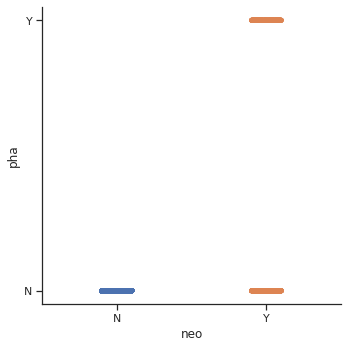

In [13]:
# comparision between neo and pha (both data's Y and N relationship)
sns.catplot(x='neo',y='pha',data=new_ad)
plt.show()

Storing and analysing all Important Parameters

In [14]:
param_imp=['diameter','albedo','e','a','q','i','tp']

In [15]:
neo[param_imp].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 432 to 315507
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  369 non-null    float64
 1   albedo    339 non-null    float64
 2   e         1239 non-null   float64
 3   a         1239 non-null   float64
 4   q         1239 non-null   float64
 5   i         1239 non-null   float64
 6   tp        1239 non-null   float64
dtypes: float64(7)
memory usage: 77.4 KB


In [16]:
neo[param_imp].describe()

,diameter,albedo,e,a,q,i,tp
count,369.000000,339.000000,1239.000000,1239.000000,1239.000000,1239.000000,1.239000e+03
mean,1.854696,0.224629,0.473095,1.720944,0.873388,17.939805,2.458944e+06
std,2.660267,0.140625,0.170560,0.528126,0.292657,13.659036,5.652612e+02
min,0.113000,0.014000,0.051470,0.617500,0.092025,0.146234,2.452765e+06
25%,0.700000,0.118000,0.348021,1.323412,0.652054,7.215027,2.458822e+06
50%,1.200000,0.210000,0.472898,1.674116,0.897337,14.361072,2.459004e+06
75%,2.123000,0.310000,0.586898,2.120316,1.127626,25.297756,2.459173e+06
max,37.675000,0.856000,0.914932,4.260620,1.299744,72.159425,2.460044e+06


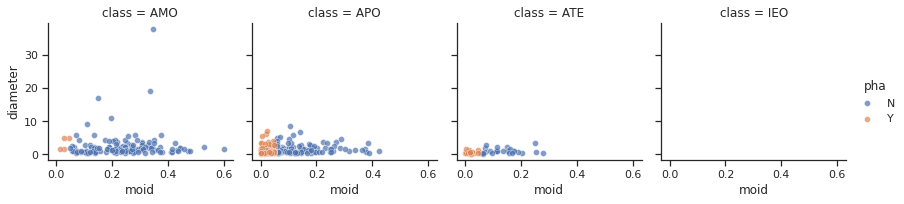

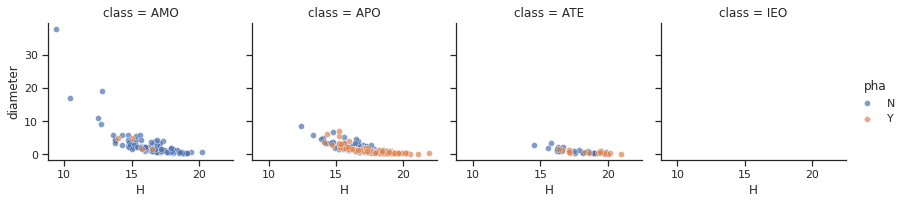

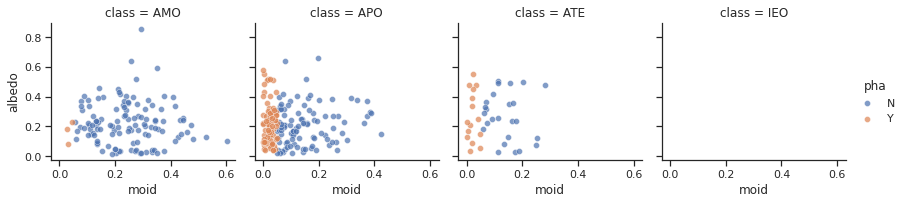

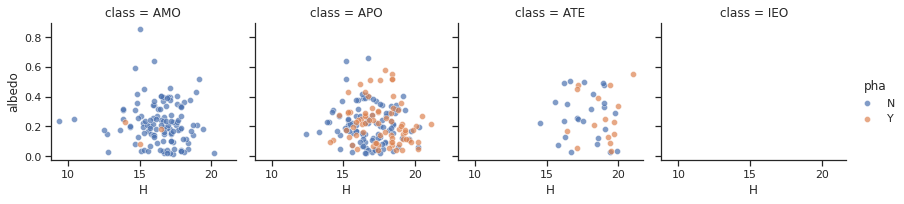

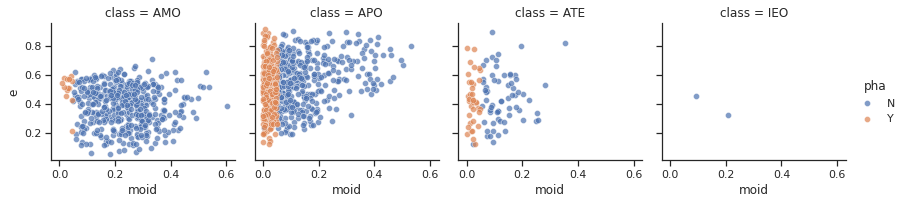

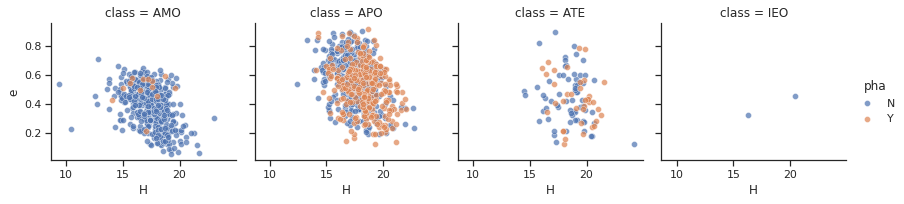

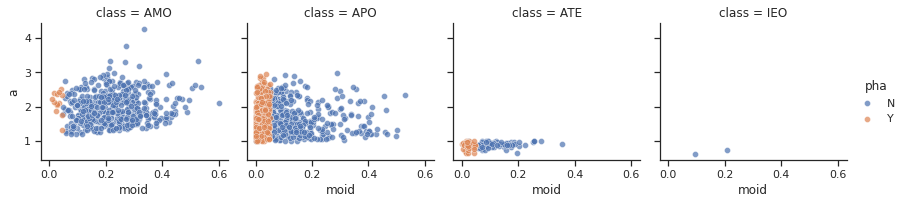

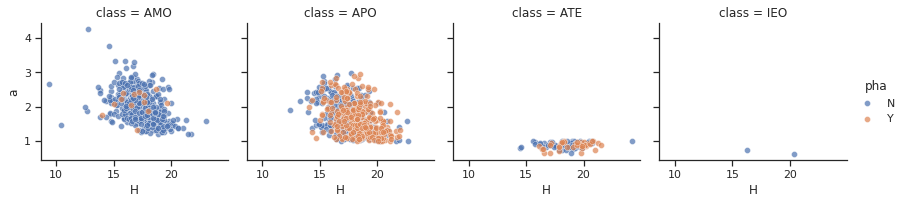

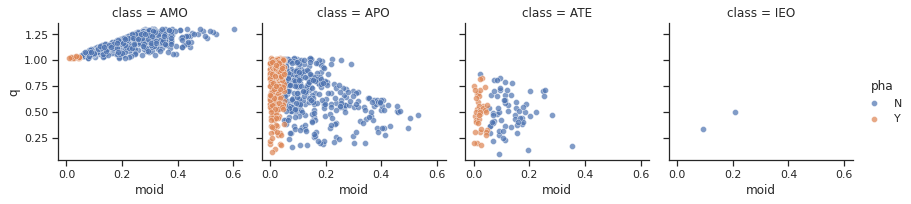

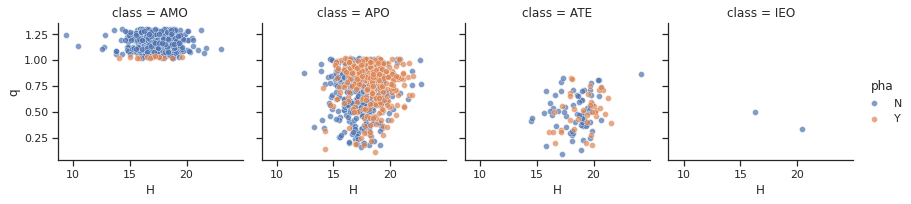

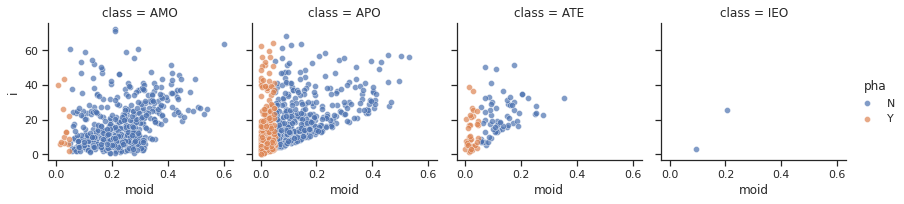

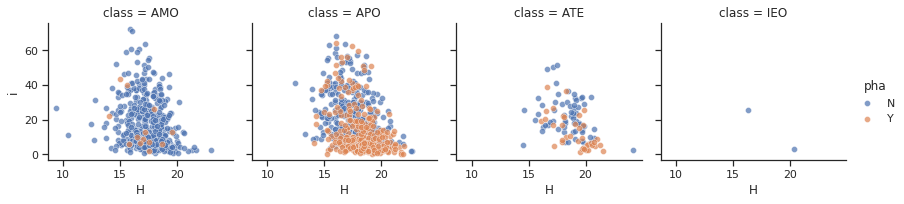

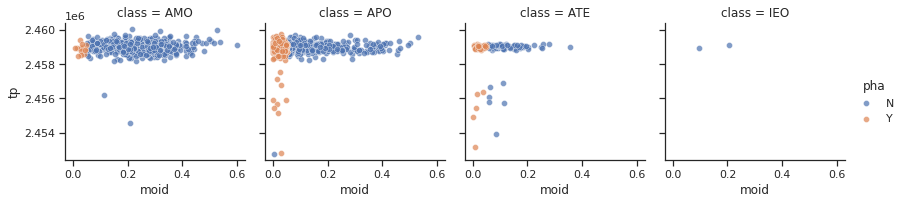

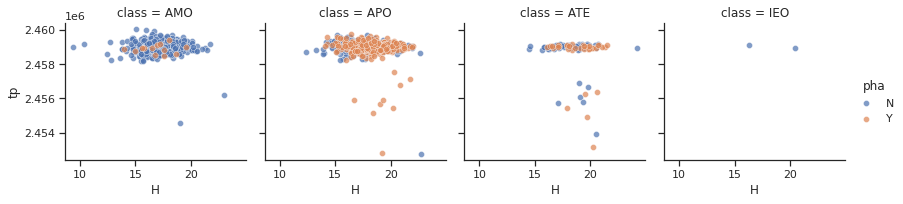

In [17]:
plot_scatter(neo,param_imp) #plotting all the classes of param_imp w.r.t. neo

Storing and analysing all other parameters

In [18]:
param_oth=['om','w','ma','ad','n','rms']

In [19]:
neo[param_oth].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 432 to 315507
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   om      1239 non-null   float64
 1   w       1239 non-null   float64
 2   ma      1239 non-null   float64
 3   ad      1239 non-null   float64
 4   n       1239 non-null   float64
 5   rms     1239 non-null   float64
dtypes: float64(6)
memory usage: 67.8 KB


In [20]:
neo[param_oth].describe()

,om,w,ma,ad,n,rms
count,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000
mean,180.076724,182.784794,181.243337,2.568500,0.530343,0.500300
std,100.557255,104.002207,105.977294,0.948349,0.283422,0.089588
min,0.112520,0.061358,0.068297,0.898221,0.112071,0.203820
25%,101.094314,92.399383,87.663577,1.817190,0.319230,0.443755
50%,176.593907,189.782507,186.946145,2.405053,0.455015,0.500300
75%,264.100354,273.735940,274.758220,3.234002,0.647383,0.559955
max,359.857930,359.590359,359.926148,7.281146,2.031182,0.873970


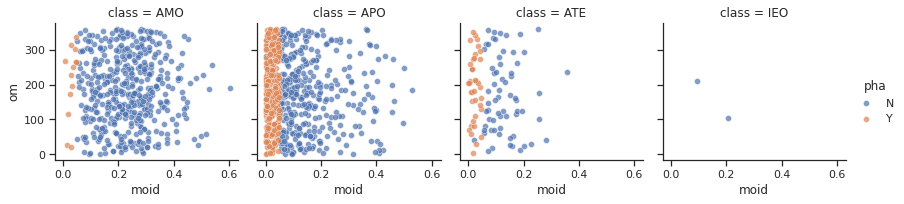

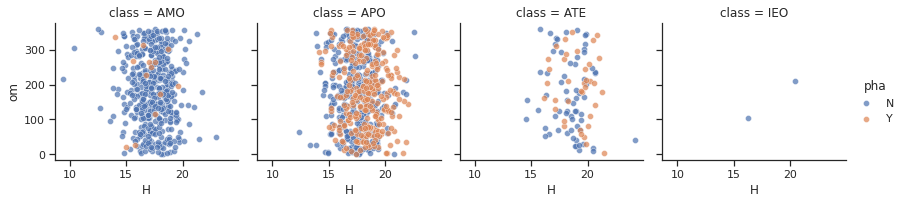

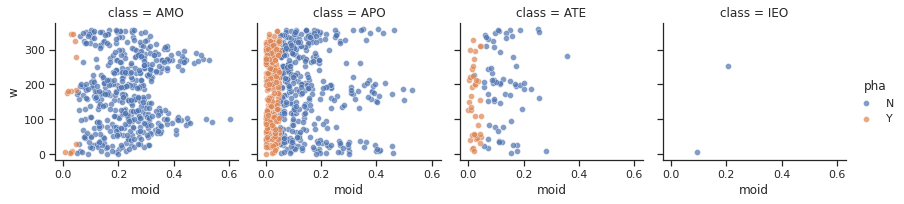

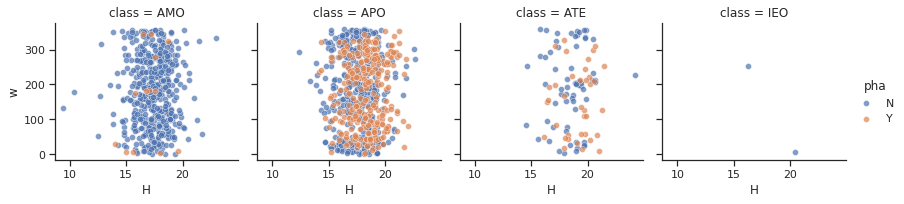

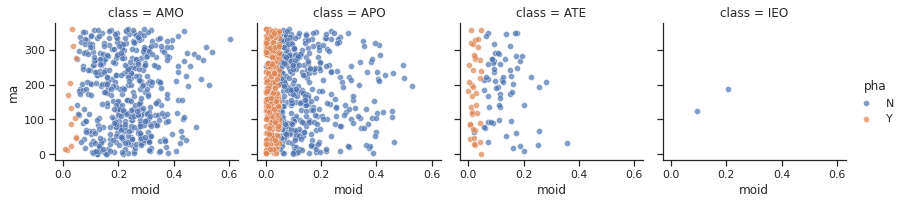

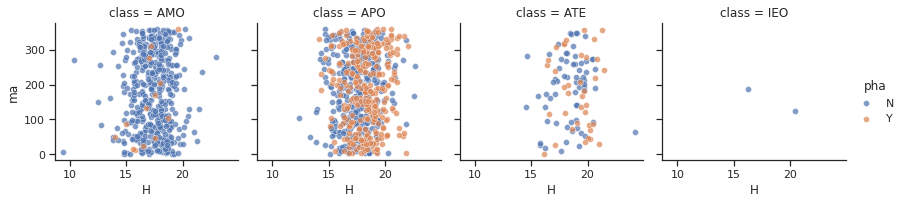

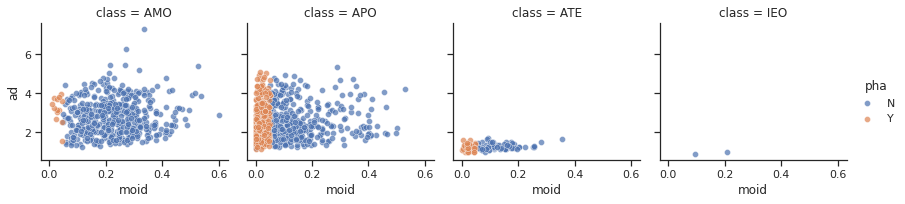

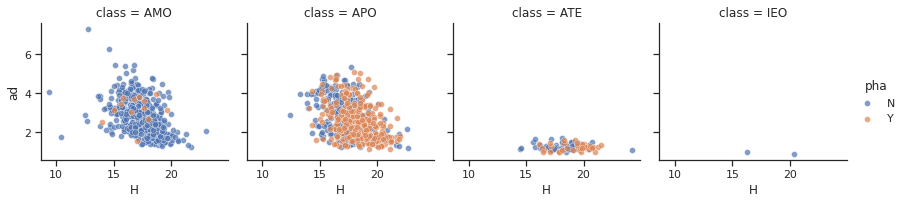

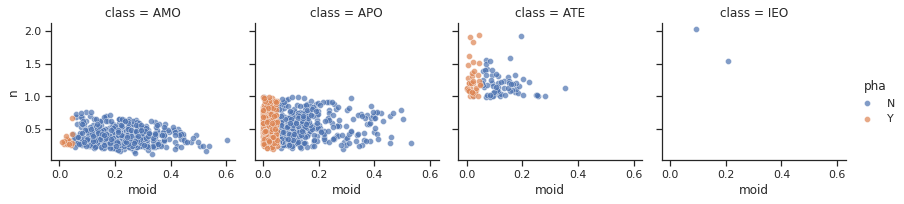

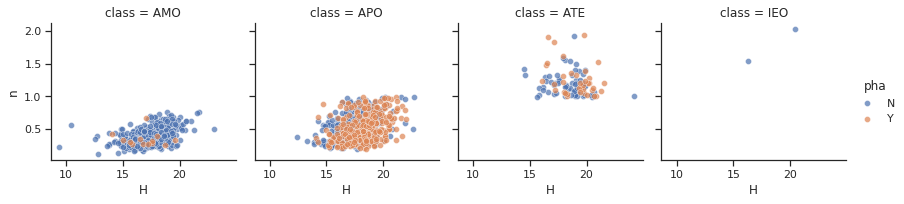

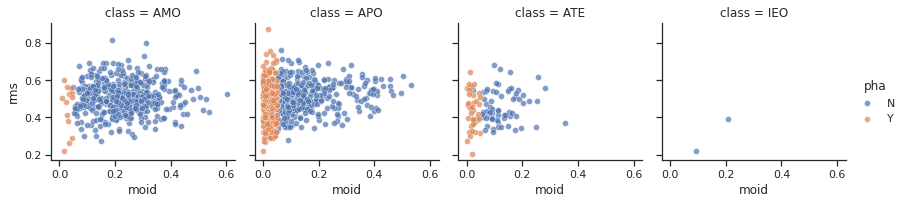

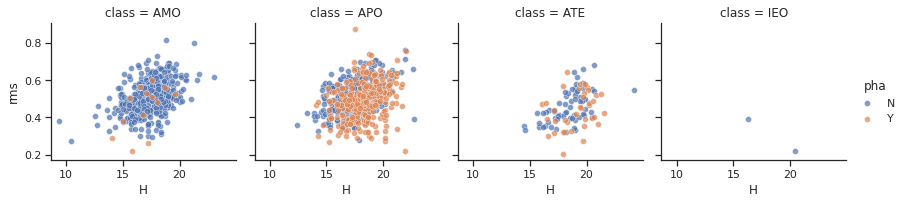

In [21]:
plot_scatter(neo,param_oth) #plotting all the classes of param_oth w.r.t. neo

Importing all the major libraries that will be required furtherly

In [22]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import pyforest
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
def convert_to_bin(df,column): #converting the string values into integer
    df[column]=df[column].map({'Y':int(1),'N':int(0),'NaN':int(0)})
    return df

In [26]:
neo_new=convert_to_bin(neo,'pha') 
neo_final=convert_to_bin(neo_new,'neo')

In [27]:
params_imp=['neo']+['pha']+param_imp #joining all important parameters together
params_all=params_imp+param_oth #joining all parameters together

In [28]:
neo_params_imp=neo_final[params_imp]
neo_params_imp

,neo,pha,diameter,albedo,e,a,q,i,tp
432,1,0,16.840,0.250,0.222951,1.458046,1.132973,10.830543,2459159.352
718,1,0,NaN,NaN,0.546558,2.638602,1.196452,11.567485,2458390.497
886,1,0,4.200,0.310,0.570332,2.473737,1.062886,9.393854,2459258.751
1035,1,0,37.675,0.238,0.533046,2.664725,1.244303,26.677643,2458979.237
1220,1,0,1.000,NaN,0.435285,1.919498,1.083970,11.876537,2458896.558
...,...,...,...,...,...,...,...,...,...
314081,1,1,NaN,NaN,0.574944,2.237837,0.951207,16.146544,2458453.094
314211,1,1,NaN,NaN,0.650854,2.132742,0.744638,6.465003,2459318.250
315019,1,0,NaN,NaN,0.321024,1.843909,1.251970,7.894835,2458937.293
315097,1,0,NaN,NaN,0.417384,0.871632,0.507827,18.698551,2459127.362


In [29]:
neo_params_all=neo_final[params_all]
neo_params_all

,neo,pha,diameter,albedo,e,a,q,i,tp,om,w,ma,ad,n,rms
432,1,0,16.840,0.250,0.222951,1.458046,1.132973,10.830543,2459159.352,304.299327,178.882295,271.071732,1.783119,0.559819,0.27423
718,1,0,NaN,NaN,0.546558,2.638602,1.196452,11.567485,2458390.497,183.866950,156.176338,140.273422,4.080752,0.229955,0.39148
886,1,0,4.200,0.310,0.570332,2.473737,1.062886,9.393854,2459258.751,110.434218,350.495585,294.579157,3.884588,0.253323,0.50197
1035,1,0,37.675,0.238,0.533046,2.664725,1.244303,26.677643,2458979.237,215.546826,132.364631,4.817745,4.085146,0.226582,0.38253
1220,1,0,1.000,NaN,0.435285,1.919498,1.083970,11.876537,2458896.558,171.326998,26.694797,38.522409,2.755027,0.370615,0.46287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314081,1,1,NaN,NaN,0.574944,2.237837,0.951207,16.146544,2458453.094,116.807845,139.376079,161.165125,3.524467,0.294416,0.65343
314211,1,1,NaN,NaN,0.650854,2.132742,0.744638,6.465003,2459318.250,316.260083,82.509364,259.450021,3.520845,0.316444,0.64127
315019,1,0,NaN,NaN,0.321024,1.843909,1.251970,7.894835,2458937.293,332.830105,281.553325,24.880652,2.435848,0.393636,0.64586
315097,1,0,NaN,NaN,0.417384,0.871632,0.507827,18.698551,2459127.362,297.440129,78.850292,206.348651,1.235436,1.211169,0.34765


In [30]:
neo_params_imp.isnull().sum()

neo           0
pha           0
diameter    870
albedo      900
e             0
a             0
q             0
i             0
tp            0
dtype: int64

In [31]:
def fill_nan(df):
    for column in df.columns:
        if column=='pha' or column=='neo':
            df[column].fillna(value=int(0),inplace=True)
        else:
            df[column].fillna(int(df[column].mean()),inplace=True)
    return df

In [32]:
neo_params_imp=fill_nan(neo_params_imp)
neo_params_all=fill_nan(neo_params_all)

In [33]:
neo_params_all

,neo,pha,diameter,albedo,e,a,q,i,tp,om,w,ma,ad,n,rms
432,1,0,16.840,0.250,0.222951,1.458046,1.132973,10.830543,2459159.352,304.299327,178.882295,271.071732,1.783119,0.559819,0.27423
718,1,0,1.000,0.000,0.546558,2.638602,1.196452,11.567485,2458390.497,183.866950,156.176338,140.273422,4.080752,0.229955,0.39148
886,1,0,4.200,0.310,0.570332,2.473737,1.062886,9.393854,2459258.751,110.434218,350.495585,294.579157,3.884588,0.253323,0.50197
1035,1,0,37.675,0.238,0.533046,2.664725,1.244303,26.677643,2458979.237,215.546826,132.364631,4.817745,4.085146,0.226582,0.38253
1220,1,0,1.000,0.000,0.435285,1.919498,1.083970,11.876537,2458896.558,171.326998,26.694797,38.522409,2.755027,0.370615,0.46287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314081,1,1,1.000,0.000,0.574944,2.237837,0.951207,16.146544,2458453.094,116.807845,139.376079,161.165125,3.524467,0.294416,0.65343
314211,1,1,1.000,0.000,0.650854,2.132742,0.744638,6.465003,2459318.250,316.260083,82.509364,259.450021,3.520845,0.316444,0.64127
315019,1,0,1.000,0.000,0.321024,1.843909,1.251970,7.894835,2458937.293,332.830105,281.553325,24.880652,2.435848,0.393636,0.64586
315097,1,0,1.000,0.000,0.417384,0.871632,0.507827,18.698551,2459127.362,297.440129,78.850292,206.348651,1.235436,1.211169,0.34765


In [34]:
neo_params_imp

,neo,pha,diameter,albedo,e,a,q,i,tp
432,1,0,16.840,0.250,0.222951,1.458046,1.132973,10.830543,2459159.352
718,1,0,1.000,0.000,0.546558,2.638602,1.196452,11.567485,2458390.497
886,1,0,4.200,0.310,0.570332,2.473737,1.062886,9.393854,2459258.751
1035,1,0,37.675,0.238,0.533046,2.664725,1.244303,26.677643,2458979.237
1220,1,0,1.000,0.000,0.435285,1.919498,1.083970,11.876537,2458896.558
...,...,...,...,...,...,...,...,...,...
314081,1,1,1.000,0.000,0.574944,2.237837,0.951207,16.146544,2458453.094
314211,1,1,1.000,0.000,0.650854,2.132742,0.744638,6.465003,2459318.250
315019,1,0,1.000,0.000,0.321024,1.843909,1.251970,7.894835,2458937.293
315097,1,0,1.000,0.000,0.417384,0.871632,0.507827,18.698551,2459127.362


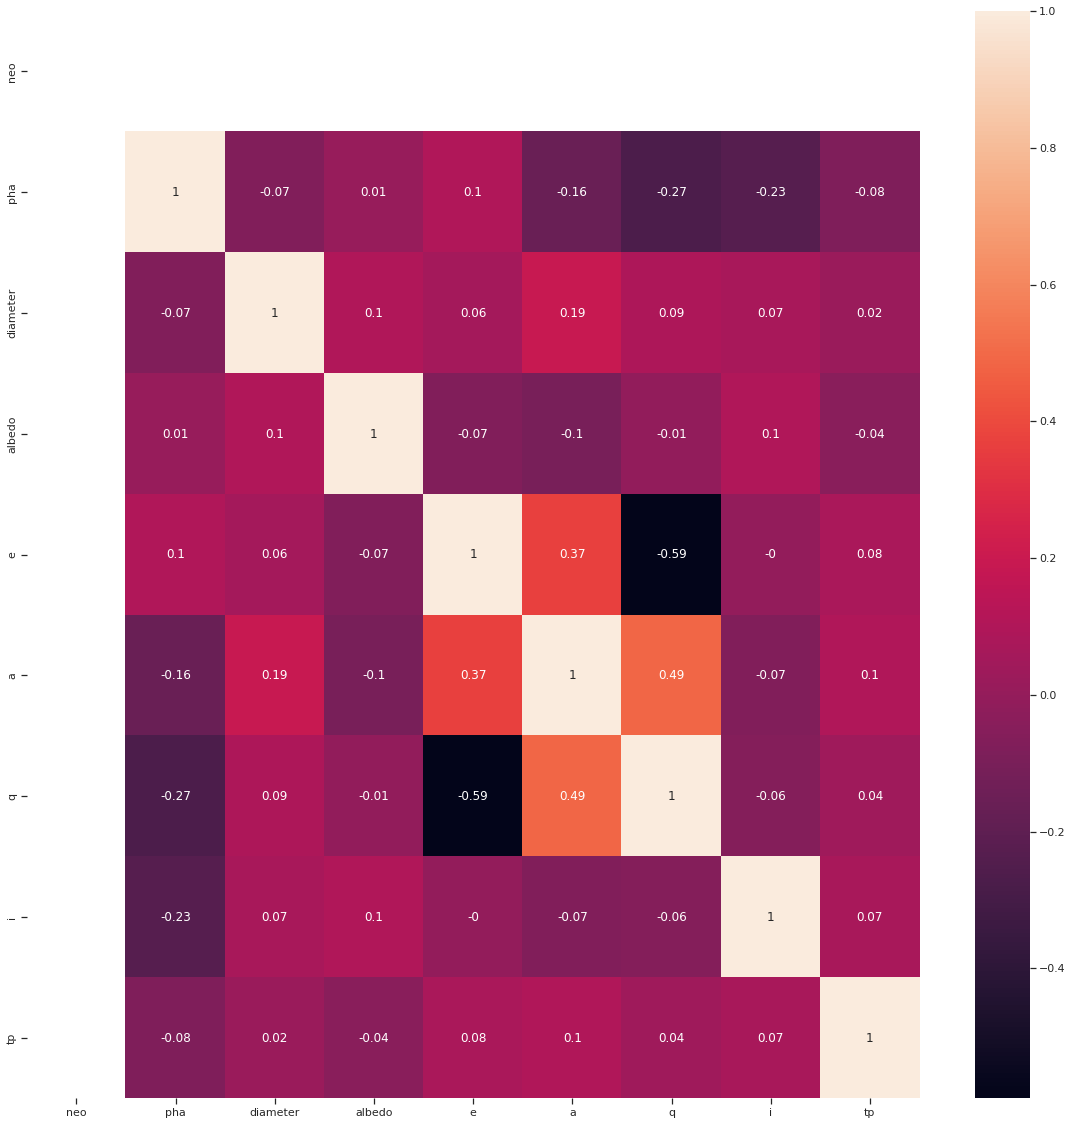

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(data=round(neo_params_imp.corr(),2),annot=True)
plt.show()

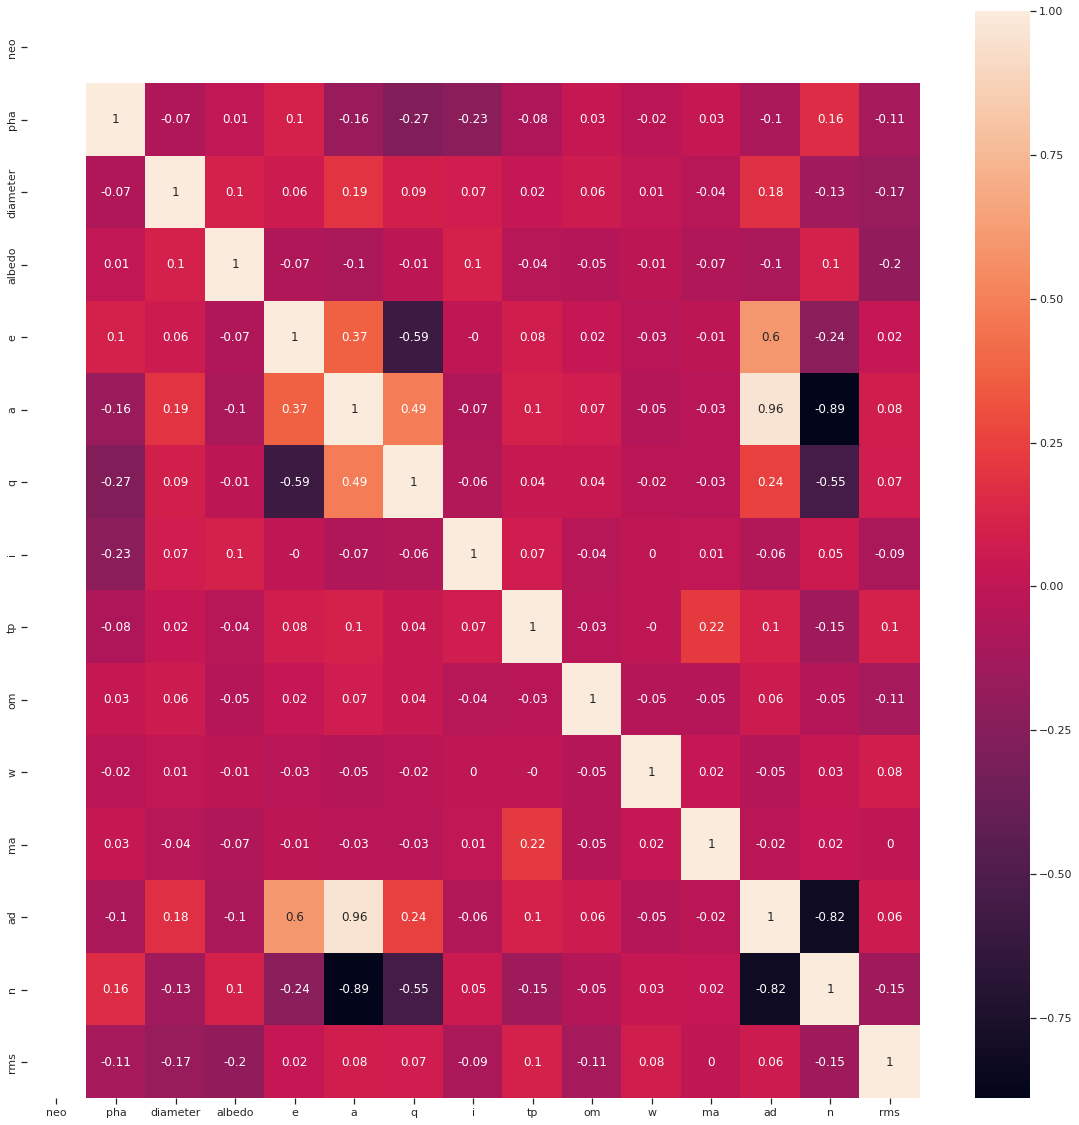

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(data=round(neo_params_all.corr(),2),annot=True)
plt.show()

# Model Selection and Analysis

In [37]:
#importing essential libraries for selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#importing libraries to implement the model while selecting 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [38]:
def model_fit_score(models, df):
    X=df.drop('pha',axis=1)
    y=df['pha']
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    model_scores=pd.DataFrame(model_scores, index =['Score']).transpose()
    model_scores=model_scores.sort_values('Score')
    return model_scores

In [39]:
models={
    'LogisticRegression':LogisticRegression(max_iter=10000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()}

In [40]:
model_scores_params_imp=model_fit_score(models,neo_params_imp)
model_scores_params_imp.sort_values('Score',ascending=False)

,Score
GradientBoostingClassifier,0.838710
SVC,0.814516
RandomForestClassifier,0.798387
AdaBoostClassifier,0.798387
LogisticRegression,0.774194
DecisionTreeClassifier,0.770161
KNeighborsClassifier,0.713710


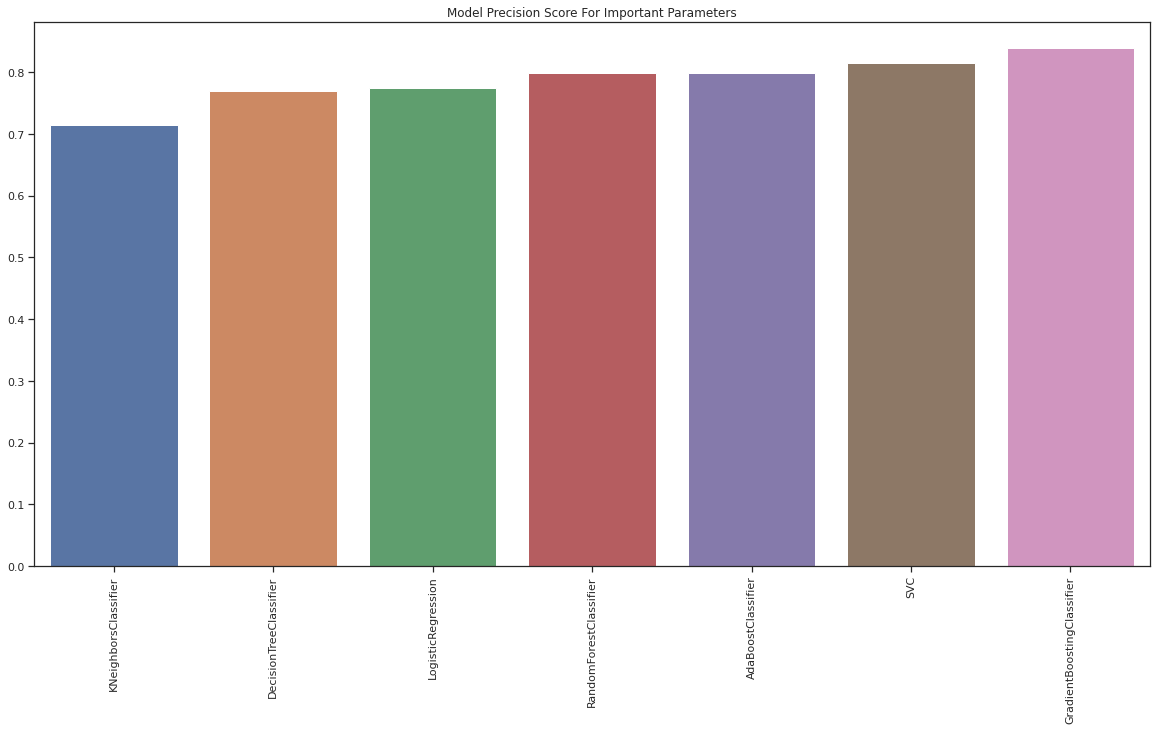

In [41]:
plt.figure(figsize=(20,10))
sns.barplot(data=model_scores_params_imp.sort_values('Score').T)
plt.title('Model Precision Score For Important Parameters')
plt.xticks(rotation=90)
plt.show()

In [42]:
model_scores_params_all=model_fit_score(models,neo_params_all)
model_scores_params_all.sort_values('Score',ascending=False)

,Score
GradientBoostingClassifier,0.838710
DecisionTreeClassifier,0.810484
RandomForestClassifier,0.810484
AdaBoostClassifier,0.794355
SVC,0.770161
LogisticRegression,0.762097
KNeighborsClassifier,0.762097


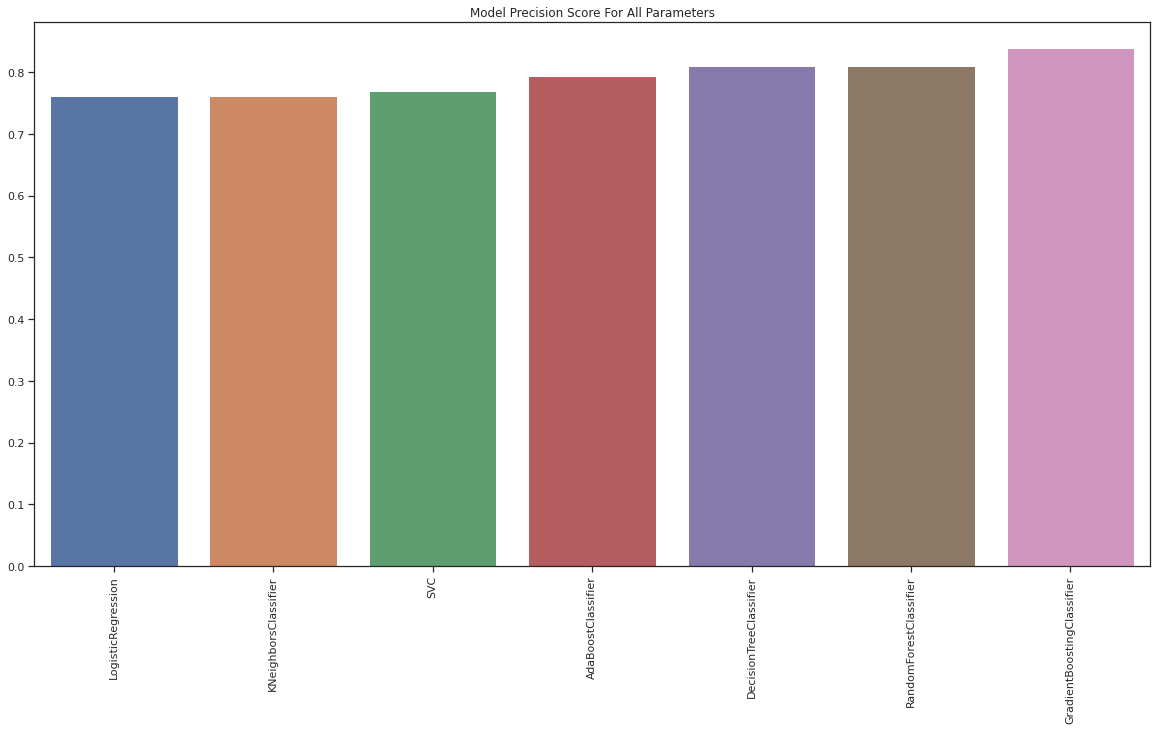

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(data=model_scores_params_all.sort_values('Score').T)
plt.title("Model Precision Score For All Parameters",fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Random Forest Classifier Model

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
def rfc(df):
    X=df.drop('pha',axis=1)
    y=df['pha']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    clf=RandomForestClassifier(n_estimators=10000)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    result=[acc,cm,cr]
    return result

### Results of RFC for Important Parameters

In [46]:
result_params_all=rfc(neo_params_all)
print("Accuracy:",result_params_all[0],'\n')
print("Confusion Matrix:\n",result_params_all[1],'\n')
print("Classification Report:",result_params_all[-1],'\n')

Accuracy: 0.7943548387096774 

Confusion Matrix:
 [[179  15]
 [ 36  18]] 

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.92      0.88       194
           1       0.55      0.33      0.41        54

    accuracy                           0.79       248
   macro avg       0.69      0.63      0.64       248
weighted avg       0.77      0.79      0.77       248
 



### Feature Importance Analysis

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
def fi_plot(df):
    X=df.drop('pha',axis=1)
    y=df['pha']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    model=RandomForestClassifier()
    model.fit(X_train,y_train)
    importances=model.feature_importances_
    sorted_indices=np.argsort(importances)[::-1]
    plt.title('Feature Importance')
    plt.bar(range(X_train.shape[1]),importances[sorted_indices],align='center')
    plt.xticks(range(X_train.shape[1]),X_train.columns[sorted_indices],rotation=90)
    plt.tight_layout()
    plt.show()

### Feature Importance for Important Parameters

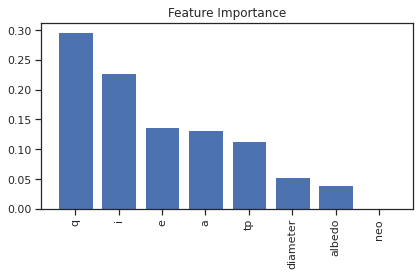

In [49]:
fi_plot(neo_params_imp)

### Feature Importance for All Parameters

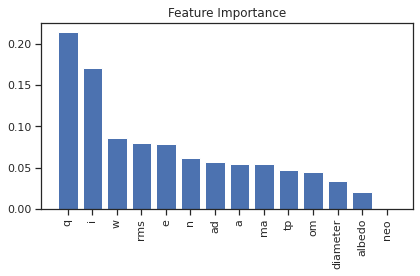

In [50]:
fi_plot(neo_params_all)

# Gradient Boosting Clustering Model

In [51]:
#from sklearn.metrics import classification_report
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

In [52]:
lr_list=[0.05,0.075,0.1,0.25,0.5,0.75,1]
X=neo_params_all.drop('pha',axis=1)
y=neo_params_all['pha']
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)
for learning_rate in lr_list:
    gb_clf=GradientBoostingClassifier(n_estimators = 20, learning_rate = learning_rate, max_features = 2, max_depth = 2, random_state = 0)
    gb_clf.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.714
Accuracy score (validation): 0.782
Learning rate:  0.075
Accuracy score (training): 0.744
Accuracy score (validation): 0.786
Learning rate:  0.1
Accuracy score (training): 0.758
Accuracy score (validation): 0.790
Learning rate:  0.25
Accuracy score (training): 0.857
Accuracy score (validation): 0.819
Learning rate:  0.5
Accuracy score (training): 0.874
Accuracy score (validation): 0.794
Learning rate:  0.75
Accuracy score (training): 0.883
Accuracy score (validation): 0.786
Learning rate:  1
Accuracy score (training): 0.903
Accuracy score (validation): 0.786


In [53]:
def gbc(df):
    X=df.drop('pha',axis=1)
    y=df['pha']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    classifier=GradientBoostingClassifier(n_estimators = 20, learning_rate = learning_rate, max_features = 2, max_depth = 2, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    acc=accuracy_score(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    result=[acc,cm,cr]
    return result

### Results of GBC for Important Parameters

In [54]:
result_params_imp=gbc(neo_params_imp)
print("Accuracy:", result_params_imp[0], '\n')
print("Confusion Matrix:\n", result_params_imp[1], '\n')
print("Classification Report:\n", result_params_imp[-1], '\n')

Accuracy: 0.8145161290322581 

Confusion Matrix:
 [[173  21]
 [ 25  29]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       194
           1       0.58      0.54      0.56        54

    accuracy                           0.81       248
   macro avg       0.73      0.71      0.72       248
weighted avg       0.81      0.81      0.81       248
 



In [55]:
result_params_all=gbc(neo_params_all)
print("Accuracy:", result_params_all[0], '\n')
print("Confusion Matrix:\n", result_params_all[1], '\n')
print("Classification Report:\n", result_params_all[-1], '\n')

Accuracy: 0.7862903225806451 

Confusion Matrix:
 [[169  25]
 [ 28  26]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       194
           1       0.51      0.48      0.50        54

    accuracy                           0.79       248
   macro avg       0.68      0.68      0.68       248
weighted avg       0.78      0.79      0.78       248
 



# SVC Model

In [56]:
def svc_lin(df):
    X=df.drop('pha',axis=1)
    y=df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    classifier=SVC(kernel='linear',random_state=0)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    acc=accuracy_score(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    result=[acc,cm,cr]
    return result

In [57]:
def svc_rbf(df):
    X=df.drop('pha',axis=1)
    y=df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    classifier=SVC(kernel='rbf',random_state=0,gamma=0.1,C=1)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    acc=accuracy_score(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    result=[acc,cm,cr]
    return result

### Results of SVC for Important Parameters

In [58]:
result_params_imp=svc_lin(neo_params_imp)
print("Accuracy:", result_params_imp[0], '\n')
print("Confusion Matrix:\n", result_params_imp[1], '\n')
print("Classification Report:\n", result_params_imp[-1], '\n')

Accuracy: 0.782258064516129 

Confusion Matrix:
 [[194   0]
 [ 54   0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       194
           1       0.00      0.00      0.00        54

    accuracy                           0.78       248
   macro avg       0.39      0.50      0.44       248
weighted avg       0.61      0.78      0.69       248
 



In [59]:
result_params_imp = svc_rbf(neo_params_imp)
print("Accuracy:", result_params_imp[0], '\n')
print("Confusion Matrix:\n", result_params_imp[1], '\n')
print("Classification Report:\n", result_params_imp[-1], '\n')

Accuracy: 0.7620967741935484 

Confusion Matrix:
 [[183  11]
 [ 48   6]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       194
           1       0.35      0.11      0.17        54

    accuracy                           0.76       248
   macro avg       0.57      0.53      0.52       248
weighted avg       0.70      0.76      0.71       248
 



### Results of SVC for All Parameters

In [60]:
result_params_all = svc_lin(neo_params_all)
print("Accuracy:", result_params_all[0], '\n')
print("Confusion Matrix:\n", result_params_all[1], '\n')
print("Classification Report:\n", result_params_all[-1], '\n')

Accuracy: 0.782258064516129 

Confusion Matrix:
 [[194   0]
 [ 54   0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       194
           1       0.00      0.00      0.00        54

    accuracy                           0.78       248
   macro avg       0.39      0.50      0.44       248
weighted avg       0.61      0.78      0.69       248
 



In [61]:
result_params_all = svc_rbf(neo_params_all)
print("Accuracy:", result_params_all[0], '\n')
print("Confusion Matrix:\n", result_params_all[1], '\n')
print("Classification Report:\n", result_params_all[-1], '\n')

Accuracy: 0.782258064516129 

Confusion Matrix:
 [[194   0]
 [ 54   0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       194
           1       0.00      0.00      0.00        54

    accuracy                           0.78       248
   macro avg       0.39      0.50      0.44       248
weighted avg       0.61      0.78      0.69       248
 



# Logistic Regression Model

In [62]:
from sklearn import metrics

In [63]:
def logrm(df):
    X = df.drop('pha', axis = 1)
    y = df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    acc = logreg.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    result = [acc, cm, cr]
    return result

### Results of LRM for Important Parameters

In [64]:
result_params_imp = logrm(neo_params_imp)
print("Accuracy:", result_params_imp[0], '\n')
print("Confusion Matrix:\n", result_params_imp[1], '\n')
print("Classification Report:\n", result_params_imp[-1], '\n')

Accuracy: 0.7540322580645161 

Confusion Matrix:
 [[187   0]
 [ 61   0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       187
           1       0.00      0.00      0.00        61

    accuracy                           0.75       248
   macro avg       0.38      0.50      0.43       248
weighted avg       0.57      0.75      0.65       248
 



### Results of LRM for All Parameters

In [65]:
result_params_all = logrm(neo_params_all)
print("Accuracy:", result_params_all[0], '\n')
print("Confusion Matrix:\n", result_params_all[1], '\n')
print("Classification Report:\n", result_params_all[-1], '\n')

Accuracy: 0.7540322580645161 

Confusion Matrix:
 [[187   0]
 [ 61   0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       187
           1       0.00      0.00      0.00        61

    accuracy                           0.75       248
   macro avg       0.38      0.50      0.43       248
weighted avg       0.57      0.75      0.65       248
 



# ANN

In [66]:
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

### Results for Important Parameters

In [67]:
def set_up_for_ann(df):
    X = df.drop('pha', axis = 1)
    y = df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=25, batch_size=16)
    _, accuracy = model.evaluate(X_test, y_test)
    print()
    print('Accuracy of test: %.2f' % (accuracy*100))

In [68]:
set_up_for_ann(neo_params_imp)

Epoch 1/25
62/62 [==============================] - 1s 1ms/step - loss: 4283.7759 - accuracy: 0.5762
Epoch 2/25
62/62 [==============================] - 0s 1ms/step - loss: 1065.2859 - accuracy: 0.5913
Epoch 3/25
62/62 [==============================] - 0s 2ms/step - loss: 695.7114 - accuracy: 0.5802
Epoch 4/25
62/62 [==============================] - 0s 2ms/step - loss: 910.8080 - accuracy: 0.5812
Epoch 5/25
62/62 [==============================] - 0s 1ms/step - loss: 938.3709 - accuracy: 0.5610
Epoch 6/25
62/62 [==============================] - 0s 1ms/step - loss: 492.9919 - accuracy: 0.5943
Epoch 7/25
62/62 [==============================] - 0s 2ms/step - loss: 1102.6156 - accuracy: 0.5853
Epoch 8/25
62/62 [==============================] - 0s 2ms/step - loss: 666.3550 - accuracy: 0.6065
Epoch 9/25
62/62 [==============================] - 0s 2ms/step - loss: 439.1026 - accuracy: 0.5661
Epoch 10/25
62/62 [==============================] - 0s 2ms/step - loss: 472.7744 - accuracy: 0.5

### Results for All Parameters

In [69]:
def set_up_for_ann2(df):
    X = df.drop('pha', axis = 1)
    y = df['pha']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    model = Sequential()
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=25, batch_size=16)
    _, accuracy = model.evaluate(X_test, y_test)
    print()
    print('Accuracy of test: %.2f' % (accuracy*100))

In [70]:
result_params_all_ann = set_up_for_ann2(neo_params_all)

Epoch 1/25
62/62 [==============================] - 1s 1ms/step - loss: 42966.2305 - accuracy: 0.7094
Epoch 2/25
62/62 [==============================] - 0s 1ms/step - loss: 17178.8809 - accuracy: 0.7094
Epoch 3/25
62/62 [==============================] - 0s 1ms/step - loss: 798.5579 - accuracy: 0.6105
Epoch 4/25
62/62 [==============================] - 0s 2ms/step - loss: 100.7722 - accuracy: 0.5873
Epoch 5/25
62/62 [==============================] - 0s 2ms/step - loss: 110.2492 - accuracy: 0.5954
Epoch 6/25
62/62 [==============================] - 0s 2ms/step - loss: 128.9442 - accuracy: 0.6024
Epoch 7/25
62/62 [==============================] - 0s 2ms/step - loss: 80.4103 - accuracy: 0.5843
Epoch 8/25
62/62 [==============================] - 0s 2ms/step - loss: 142.2486 - accuracy: 0.5782
Epoch 9/25
62/62 [==============================] - 0s 2ms/step - loss: 159.2040 - accuracy: 0.5883
Epoch 10/25
62/62 [==============================] - 0s 2ms/step - loss: 59.4898 - accuracy: 0.59